In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
from __future__ import unicode_literals

import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib notebook

Default plot settings.

In [2]:
try:
    import seaborn as sns
    sns.set()
    sns.set_style("whitegrid")
    sns.set_context("poster")
except ImportError as e:
    print("Cannot import seaborn.")
    print("Consider installing it for nice plot !")

mpl.rcParams['figure.figsize'] = [12.0, 9.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 22
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'


# Introduction



# Load data




In [3]:
from dataset import load_hit_generator, load_hit_truth_generator

In [4]:
data_path = "./training/"

In [5]:
event_truth_generator = load_hit_truth_generator(data_path)
event_id, event, truth = next(event_truth_generator)
event.head()

,hit_id,volume_id,layer_id,module_id,x,y,z,ncells,pixels
0,1,0,0,0,342.087,706.951,-411.917,10,"[[169, 0, 0.156346], [168, 0, 0.162262], [167,..."
1,2,0,0,0,-760.652,208.299,-206.336,5,"[[338, 0, 0.108103], [339, 0, 0.273338], [340,..."
2,3,0,0,0,-147.435,-771.409,412.083,5,"[[163, 0, 0.0829361], [164, 0, 0.228939], [165..."
3,4,0,0,0,255.164,-734.272,-102.913,2,"[[163, 0, 0.248565], [164, 0, 0.513361]]"
4,5,0,0,0,879.780,521.534,412.468,4,"[[3, 0, 0.0959233], [4, 0, 0.293231], [5, 0, 0..."


In [6]:
truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz
0,1,72061030011764736,776.9020,13.5016,474.564,0.141095,-0.225838,0.144670
1,2,148618925142179840,772.4510,155.5630,427.510,0.413254,-0.155945,0.222111
2,3,171149292801630210,84.6842,-1011.6400,-259.937,0.233259,-0.063280,-0.049709
3,4,112599336533098496,-704.6810,-326.8910,-138.185,-0.572756,-0.522737,-0.130451
4,5,117100530978783232,-772.9140,-141.6470,427.248,-0.459760,0.152317,0.258209


# Visualization

In [7]:
event['r'] = np.hypot(event['x'],event['y'])
event['phi'] = np.arctan2(event['y'], event['x'])

In [8]:
n_samples = 1000

event_sample = event.sample(n_samples)

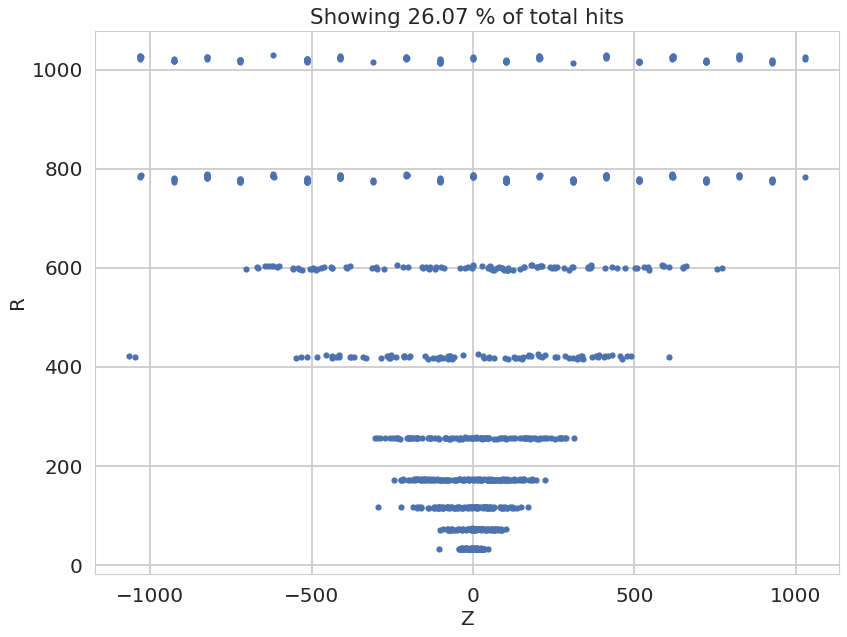

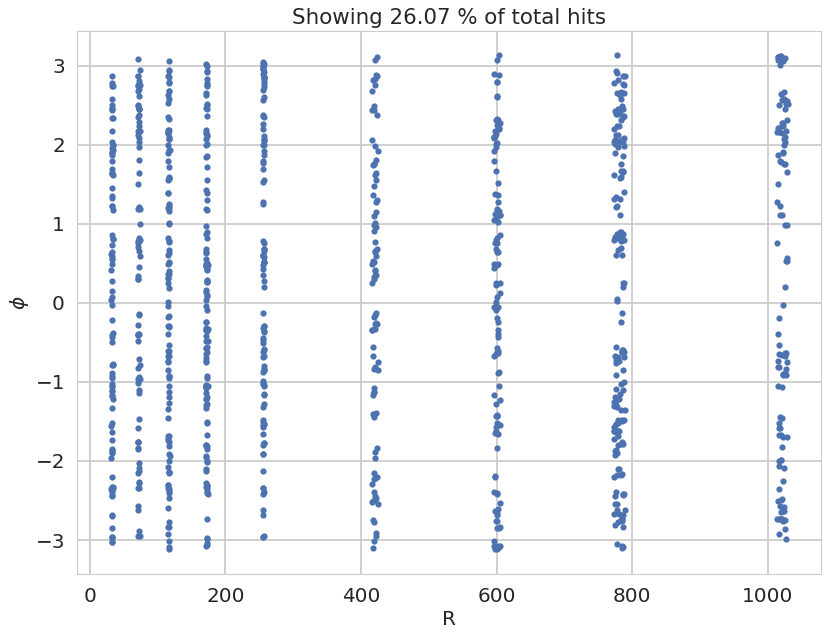

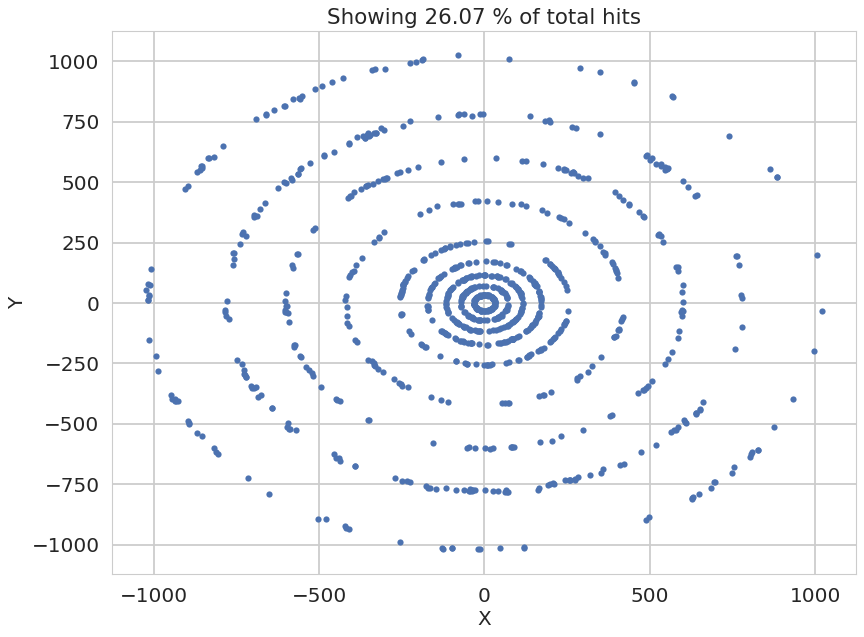

In [9]:
fig = plt.figure()
plt.plot(event_sample.z, event_sample.r, ".")
plt.xlabel("Z")
plt.ylabel("R")
percentage = 100 * len(event_sample) / len(event)
plt.title("Showing {:.2f} % of total hits".format(percentage))
plt.show()

fig = plt.figure()
plt.plot(event_sample.r, event_sample.phi, ".")
plt.xlabel("R")
plt.ylabel("$\phi$")
percentage = 100 * len(event_sample) / len(event)
plt.title("Showing {:.2f} % of total hits".format(percentage))
plt.show()

fig = plt.figure()
plt.plot(event_sample.x, event_sample.y, ".")
plt.xlabel("X")
plt.ylabel("Y")
percentage = 100 * len(event_sample) / len(event)
plt.title("Showing {:.2f} % of total hits".format(percentage))
plt.show()

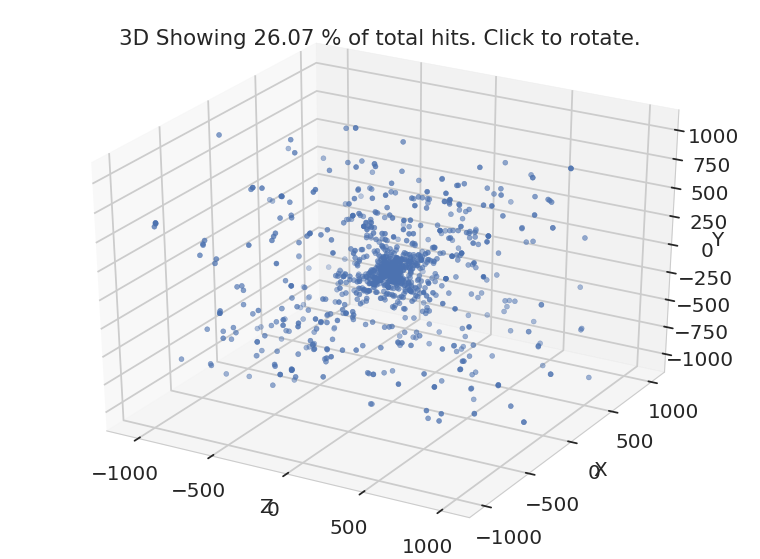

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(event_sample.z, event_sample.x, event_sample.y, ".")

ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')
percentage = 100 * len(event_sample) / len(event)
plt.title("3D Showing {:.2f} % of total hits. Click to rotate.".format(percentage))

plt.show()

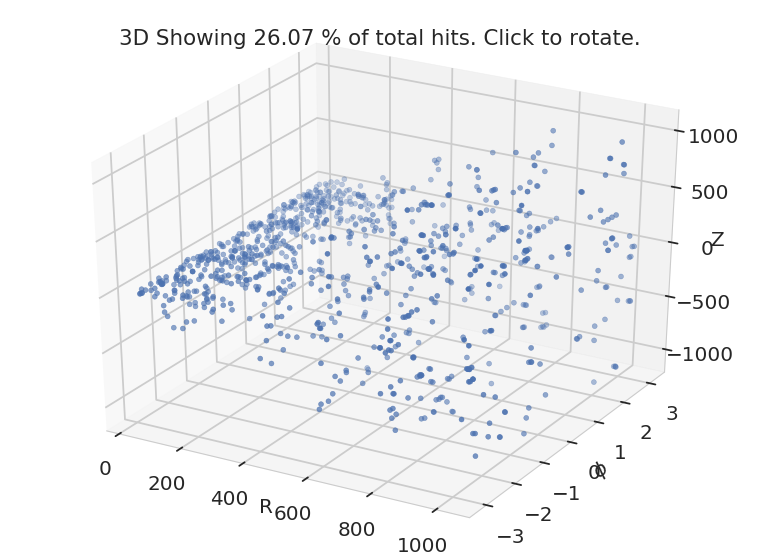

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(event_sample.r, event_sample.phi, event_sample.z, ".")

ax.set_xlabel('R')
ax.set_ylabel('$\phi$')
ax.set_zlabel('Z')
percentage = 100 * len(event_sample) / len(event)
plt.title("3D Showing {:.2f} % of total hits. Click to rotate.".format(percentage))

plt.show()